In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Bài 2 - Ôn tập Biến ngẫu nhiên và Giới thiệu Thống kê Tính toán (Review of Random Variables and Introduction to Computational Statistics)

**THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (CLC)**

*(Vũ Quốc Hoàng, FIT - HCMUS, vqhoang@fit.hcmus.edu.vn)*

## Chủ đề

1. Ôn tập một số thư viện Python: Numpy, seaborn và SciPy Statistics
2. Ôn tập biến ngẫu nhiên rời rạc
3. Ôn tập biến ngẫu nhiên liên tục
4. Xấp xỉ kì vọng của biến ngẫu nhiên bằng phương pháp mô phỏng
5. Xấp xỉ phân phối của biến ngẫu nhiên bằng phương pháp mô phỏng

## Ôn tập một số thư viện Python

* [Python cơ bản](https://github.com/vqhBook/python)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [seaborn User guide and tutorial](https://seaborn.pydata.org/tutorial.html#)
* [SciPy Statistics (scipy.stats)](https://docs.scipy.org/doc/scipy/tutorial/stats.html)

## Ôn tập biến ngẫu nhiên rời rạc

### Các khái niệm cơ bản

Hàm $X: \Omega \rightarrow A$, gắn mỗi kết quả $\omega \in \Omega$ một giá trị $X(\omega) \in A$ được gọi là **biến ngẫu nhiên** (random variable) với $A$ là **tập/miền giá trị** (thường là tập con của $\mathbb{R}$).    

Cho biến ngẫu nhiên $X$, tập các xác suất $\{P(X \in C): C \subset \mathbb{R}\}$ xác định một độ đo xác suất trên $\mathbb{R}$ và được gọi là **phân phối** (distribution) của $X$.

$X$ được gọi là **biến ngẫu nhiên rời rạc** (discrete random variable) nếu tập giá trị của nó là **rời rạc** (**hữu hạn** (finite) hoặc **vô hạn đếm được** (countably infinite)).

Cho $X$ là biến ngẫu nhiên rời rạc, **hàm xác suất** (probability function, probability mass function) của $X$ là hàm $f: \mathbb{R} \rightarrow \mathbb{R}$, được xác định bởi
$$
f(x) = f_X(x) = P(X = x), x \in \mathbb{R}.
$$

Hàm xác suất xác định phân phối của biến ngẫu nhiên rời rạc
$$
P(X \in C) = \sum_{x \in C} f(x), C \subset \mathbb{R}.
$$

Hai biến ngẫu nhiên $X, Y$ được gọi là **độc lập** (independent) nếu với mọi $A, B \subset \mathbb{R}$ ta có
$$
P\left((X \in A) \cap (Y \in B)\right) = P(X \in A)P(Y \in B).
$$

**Mệnh đề** Hai biến ngẫu nhiên rời rạc $X, Y$ độc lập khi và chỉ khi 
$$
P\left((X = x) \cap (Y = y)\right) = P(X = x)P(Y = y)
$$
với mọi $x, y \in \mathbb{R}$.

Cho biến ngẫu nhiên rời rạc $X$ với hàm xác suất $f$, **kì vọng** (mean) của $X$, kí hiệu $E(X)$, là số thực được tính bởi ("nếu tính được")
$$
E(X) = \mu_X = \mu = \sum_x xP(X = x) = \sum_x xf(x).
$$

Cho biến ngẫu nhiên rời rạc $X$ với hàm xác suất $f$ và kì vọng $\mu = E(X)$, **phương sai** (variance) của $X$, kí hiệu $Var(X)$, là số thực được tính bởi ("nếu tính được")
$$
Var(X) = \sigma^2_X = \sigma^2 = E\left((X - \mu)^2\right) = \sum_x (x - \mu)^2 P(X = x) = \sum_x  (x - \mu)^2f(x).
$$

$\sigma = \sigma_X = \sqrt{\sigma_X^2} = \sqrt{Var(X)}$ là **độ lệch chuẩn** (standard deviation) của $X$.    

Biến ngẫu nhiên rời rạc $X$ được gọi là có **phân phối Bernoulli** (Bernoulli distribution) với tham số $p\; (0 \le p \le 1)$, kí hiệu $X \sim \text{Bernoulli}(p)$, nếu $X$ có tập giá trị là $\{0, 1\}$ và
$$
f(x) = P(X = x) = 
    \begin{cases}
        p & \text{nếu } x = 1, \\
        1 - p & \text{nếu } x = 0.
    \end{cases}
$$

Khi đó, $X$ có kì vọng $E(X) = p$ và phương sai $Var(X) = p(1 - p)$.    

Biến ngẫu nhiên rời rạc $X$ được gọi là có **phân phối nhị thức** (binomial distribution) với tham số $n \;(n \in \mathbb{N}), p\; (0 \le p \le 1)$, kí hiệu $X \sim \mathcal{B}(n, p)$, nếu $X$ có tập giá trị là $\{0, 1, ..., n\}$ và
$$
f(x) = P(X = x) = C_n^x p^x(1 - p)^{n-x}, x \in \{0, 1, ..., n\}.
$$

Khi đó, $X$ có kì vọng $E(X) = np$ và phương sai $Var(X) = np(1 - p)$.    

Biến ngẫu nhiên rời rạc $X$ được gọi là có **phân phối hình học** (geometric distribution) với tham số $p\; (0 < p \le 1)$, kí hiệu $X \sim \text{Geometric}(p)$, nếu $X$ có tập giá trị là $\{1, 2, ...\}$ và
$$
f(x) = P(X = x) = (1 - p)^{x-1}p, x \in \{1, 2, ...\}.
$$
    
Khi đó, $X$ có kì vọng $E(X) = \frac{1}{p}$ và phương sai $Var(X) = \frac{1-p}{p^2}$.

Để xấp xỉ kì vọng $E(X)$ của một biến ngẫu nhiên $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, ghi nhận các giá trị mà $X$ nhận $x_1, x_2, ..., x_N$ (còn gọi là mẫu dữ liệu - sample), và tính trung bình mẫu
$$\bar{x} = \frac{x_1 + x_2 + ... + x_N}{N}.$$ 

> Khi $N$ đủ lớn, ta có $\bar{x} \approx E(X)$. 

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được **mô phỏng** (simulate) trên máy tính. (Chẳng hạn dùng thư viện tạo số ngẫu nhiên [random](https://docs.python.org/3/library/random.html).)

### Bài toán thu thập phiếu thưởng

**Bài toán thu thập phiếu thưởng** (coupon collector's problem). Một cửa hàng phát hành $n$ loại phiếu thưởng khác nhau. Mỗi lần khách mua hàng sẽ được cửa hàng phát một tờ phiếu thưởng ngẫu nhiên trong $n$ loại. Khi khách thu thập được đủ $n$ loại phiếu thưởng thì được cửa hàng tặng quà.

*Hỏi:* khách cần mua hàng bao nhiêu lần từ cửa hàng để được nhận quà?

**Tính toán chính xác**

Gọi $X$ là số lần khách cần mua hàng để được nhận quà, tức là số lần cần mua hàng từ đầu cho đến khi thu thập *vừa đủ* $n$ loại phiếu thưởng.
    
Gọi $X_i$ là số lần cần mua hàng từ lúc *vừa đã có* $i - 1$ loại phiếu thưởng cho đến khi thu thập thêm được một loại mới để có *vừa đúng* $i$ loại phiếu thưởng ($i = 1, 2, ..., n$).
    
Ta có $X = \sum_{i=1}^n X_i$ và $X_i$ có phân phối hình học với tham số
$$
p_i = \frac{n - (i - 1)}{n} = \frac{n - i + 1}{n} \; (i=1, 2, ..., n).
$$

Từ đó ta có
$$
    E(X) = E\left(\sum_{i=1}^n X_i\right) = \sum_{i=1}^n E(X_i) = \sum_{i=1}^n \frac{n}{n-i+1} = n\sum_{i=1}^n \frac{1}{i} = nH_n,
$$
với $H_n = \sum_{i=1}^n \frac{1}{i}$ được gọi là **số điều hòa** (harmonic number) thứ $n$.

In [2]:
def H(n):
    return sum(1/i for i in range(1, n + 1))

def mean_num_buy_to_win(n):
    return n*H(n)

mean_num_buy_to_win(10)

29.289682539682538

**Mô phỏng**

In [3]:
def num_buy_to_win(n):
    coupons = []
    while len(set(coupons)) < n:
        coupons.append(random.randint(1, n))
    return len(coupons)

def average(n, N, X):
    m = sum(X(n) for _ in range (N))
    return m/N

average(10, 1000, num_buy_to_win)

29.034

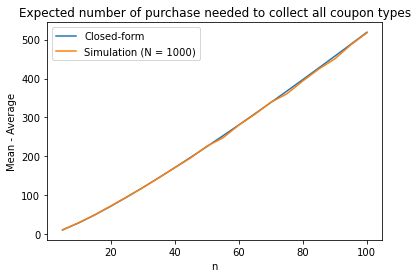

In [4]:
N = 1000
n_list = [5*i for i in range(1, 21)]
E_list = [mean_num_buy_to_win(n) for n in n_list]
A_list = [average(n, N, num_buy_to_win) for n in n_list]

plt.plot(n_list, E_list, label="Closed-form")
plt.plot(n_list, A_list, label="Simulation (N = {})".format(N))
plt.legend()
plt.xlabel("n")
plt.ylabel("Mean - Average")
plt.title("Expected number of purchase needed to collect all coupon types")

#plt.tight_layout()
#plt.savefig("coupon.pdf")

plt.show()

## Ôn tập biến ngẫu nhiên liên tục

### Các khái niệm cơ bản

$X$ được gọi là **biến ngẫu liên tục** (continuous random variable) nếu có hàm số không âm $f: \mathbb{R} \rightarrow \mathbb{R}$ sao cho với mọi khoảng $[a, b]$ trong $\mathbb{R}$ ta có
$$
P(a \le X \le b) = \int_a^b f(x)dx.
$$

$f$ được gọi là **hàm mật độ xác suất** (probability denstity function) của $X$.

Hàm mật độ xác suất có tính chất: $f(x) \ge 0, \forall x \in \mathbb{R}$ và $\int_{-\infty}^{\infty} f(x)dx = 1$.

Hàm mật độ xác suất xác định phân phối của biến ngẫu nhiên liên tục
$$
P(X \in C) = \int_C f(x)dx, C \subset \mathbb{R}.
$$      

**Hàm phân phối (tích lũy)** (distribution function, cumulative distribution function) của một biến ngẫu nhiên $X$ là hàm số $F: \mathbb{R} \rightarrow \mathbb{R}$ được xác định bởi
$$
F(x) = P(X \le x) = 
\begin{cases}
    \sum_{t \le x} f(t) & \text{nếu $X$ rời rạc với hàm xác suất $f$},\\
    \int_{-\infty}^x f(t)dt & \text{nếu $X$ liên tục với hàm mật độ xác suất $f$}.
\end{cases}
$$

$F$ xác định phân phối của $X$.

Cho biến ngẫu nhiên liên tục $X$ với hàm mật độ xác suất $f$

> **Kì vọng** (mean) của $X$ được tính bởi
  $$
  \mu = E(X) = \int_{-\infty}^{\infty} xf(x)dx,
  $$
> **Phương sai** (variance) của $X$ được tính bởi
  $$
  \sigma^2 = Var(X) = E\left((X - \mu)^2\right) = \int_{-\infty}^{\infty} (x - \mu)^2f(x)dx,
  $$
> Với hàm số $r: \mathbb{R} \rightarrow \mathbb{R}$ và $Y = r(X)$
  $$
  E(Y) = E(r(X)) = \int_{-\infty}^{\infty} r(x)f(x)dx.
  $$

Biến ngẫu nhiên liên tục $X$ được gọi là có **phân phối đều** (uniform distribution) trên $[a, b]$ với $a < b$, kí hiệu $X \sim \mathcal{U}(a, b)$, nếu $X$ có tập giá trị là $[a, b]$ và
$$
f(x) = 
    \begin{cases}
        \frac{1}{b - a} & \text{nếu } a \le x \le b, \\
        0 & \text{khác}.
    \end{cases}
$$
    
Khi đó, $X$ có kì vọng $E(X) = \frac{a+b}{2}$ và phương sai $Var(X) = \frac{(b-a)^2}{12}$.

Biến ngẫu nhiên liên tục $X$ được gọi là có **phân phối mũ** (exponential distribution) với tham số $\lambda \; (\lambda > 0)$, kí hiệu $X \sim \text{Exp}(\lambda)$, nếu $X$ có tập giá trị là $[0, \infty)$ và
$$
f(x) = 
    \begin{cases}
        \lambda e^{-\lambda x} & \text{nếu } x \ge 0, \\
        0 & \text{khác}.
    \end{cases}
$$

Khi đó, $X$ có kì vọng $E(X) = \frac{1}{\lambda}$, phương sai $Var(X) = \frac{1}{\lambda^2}$.

Biến ngẫu nhiên liên tục $X$ được gọi là có **phân phối chuẩn** (normal distribution) với trung bình $\mu$ và phương sai $\sigma^2 \; (\sigma > 0)$, kí hiệu $X \sim \mathcal{N}(\mu, \sigma^2)$, nếu $X$ có hàm mật độ xác suất
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}, x \in \mathbb{R}.
$$
Khi đó, $X$ có kì vọng $E(X) = \mu$ và phương sai $Var(X) = \sigma^2$.

Trường hợp $Z \sim \mathcal{N}(0, 1)$ thì $Z$ được gọi là có **phân phối chuẩn tắc** (standard normal distribution).

### Luật Zipf

**Luật Zipf** (Zipf's law) trong ngôn ngữ học định lượng: **tần số** (frequency) của từ tỉ lệ nghịch với **hạng** (rank) của nó (trong nhiều kho ngữ liệu)
$$
f(r) = c \times \frac{1}{r^s} \text{ hay } \log f(r) = \log c - s\log r
$$
trong đó hằng số $c$ là hệ số tỉ lệ, hằng số $s \approx 1$ là số mũ, $f(r)$ là tần số của từ có hạng $r \; (r = 1, 2, ...)$.

**Luật Zipf-Mandelbrot** mở rộng luật Zipf
$$
f(r) = c \times \frac{1}{(r + q)^s} \text{ hay } \log f(r) = \log c - s\log (r + q).
$$

In [5]:
# Zipf–Mandelbrot law: f = c(r + q)^(-s)
# log(f) = log(c) - s log(r + q)
def fit_ZM(freq, rank, q_list):
    log_freq = np.log10(freq)
    msqe = np.zeros(len(q_list))
    opt_msqe, opt_q, opt_intercept, opt_slope = float("Inf"), None, None, None
    for i, q in enumerate(q_list):
        log_rank = np.log10(rank + q)
        res = stats.linregress(log_rank, log_freq)
        msqe[i] = np.sum((log_freq - (res.intercept + res.slope*log_rank))**2)
        if msqe[i] < opt_msqe:
            opt_msqe, opt_q, opt_intercept, opt_slope = msqe[i], q, res.intercept, res.slope
    
    plt.plot(q_list, msqe)
    plt.show()
    
    return opt_q, opt_intercept, opt_slope

### Truyện Kiều - Nguyễn Du

In [6]:
import io
import collections

file = io.open("TruyenKieu.txt", mode="r", encoding="utf-8")

text = file.read()
print("Number of sentences:", text.count("\n") + 1)
text = text.split()
print("Number of words:", len(text))
counter = collections.Counter(text)
print("Number of unique words:", len(counter))

most_common_words = counter.most_common(1000)
freq = np.array([f for _, f in most_common_words])
word = np.array([w for w, _ in most_common_words])
rank = np.arange(1, len(freq) + 1)

import pandas

df = pandas.DataFrame({"Rank": rank, "Word": word, "Frequency": freq})
df[:20]

Number of sentences: 3254
Number of words: 22778
Number of unique words: 2383


,Rank,Word,Frequency
0,1,một,321
1,2,đã,263
2,3,người,223
3,4,nàng,200
4,5,lòng,174
5,6,lời,172
6,7,là,170
7,8,cho,170
8,9,cũng,169
9,10,có,161


**Zipf law**

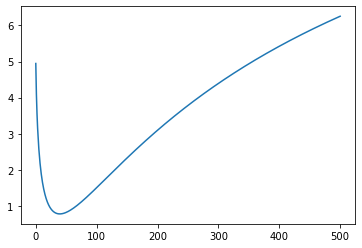

39.0 4.0465781988335845 -1.1139514647740218


In [7]:
q_list = np.linspace(0, 500, 501)
opt_q, opt_intercept, opt_slope = fit_ZM(freq, rank, q_list)
print(opt_q, opt_intercept, opt_slope)

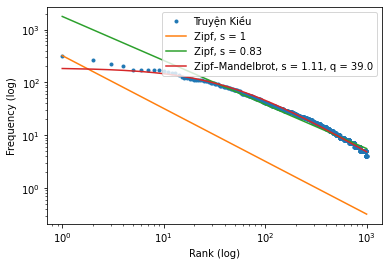

In [8]:
res = stats.linregress(np.log10(rank), np.log10(freq))

zipf_freq = (freq[0]/rank[0])/rank
Z_reg_freq = np.power(10, res.slope*np.log10(rank) + res.intercept)
ZM_reg_freq = np.power(10, opt_slope*np.log10(rank + opt_q) + opt_intercept)

plt.loglog(rank, freq, ".", label="Truyện Kiều")
plt.loglog(rank, zipf_freq, label="Zipf, s = 1")
plt.loglog(rank, Z_reg_freq, label="Zipf, s = {0:0.2f}".format(-res.slope))
plt.loglog(rank, ZM_reg_freq, label="Zipf–Mandelbrot, s = {0:0.2f}, q = {1:0.1f}".format(-opt_slope, opt_q))

plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.legend()

#plt.tight_layout()
#plt.savefig("TK_Zipf_law.pdf")

plt.show()

### "Mô hình chú khỉ"

**Mô hình**: có một chú khỉ ngồi gõ bàn phím từ bộ kí tự có $M$ chữ cái và phím cách. Từ là dãy kí tự phân cách bởi phím cách, chẳng hạn dãy phím gõ `a_mdf__pwell_` tạo ra 3 từ là `a`, `mdf`, `pwell`. Giả sử chú khỉ chưa đi học (nên gõ đại) và rất rảnh rỗi (nên gõ được văn bản rất dài). Trên văn bản mà chú khỉ tạo ra ta cũng thấy luật Zipf giữa tần số với hạng của từ!

In [9]:
def monkey(N, k, alphabet, space=" "):
    alphabet += space
    words = []
    curWord = ""
    while len(words) < N:
        letter = random.choice(alphabet)
        if letter == space:
            if curWord == "":
                continue
            words.append(curWord)
            curWord = ""
        else:
            curWord += letter
    word_freqs = collections.Counter(words).most_common()
    freq = np.array([f for _, f in word_freqs])
    rank = np.array([int(r) for r in np.logspace(0, np.log10(len(freq)), num=k)])
            
    return rank, freq[rank - 1]

In [10]:
import string

M = 5 # alphabet size
N = 500_000 # number of word for simulation
rank, freq = monkey(N, 1000, alphabet=string.ascii_lowercase[:M])

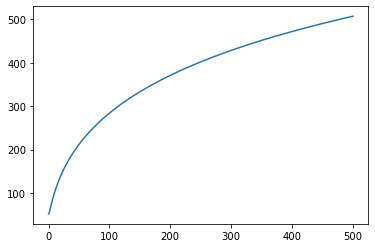

0.0 4.408699094315011 -0.9549291315540405


In [11]:
q_list = np.linspace(0, 500, 501)
opt_q, opt_intercept, opt_slope = fit_ZM(freq, rank, q_list)
print(opt_q, opt_intercept, opt_slope)

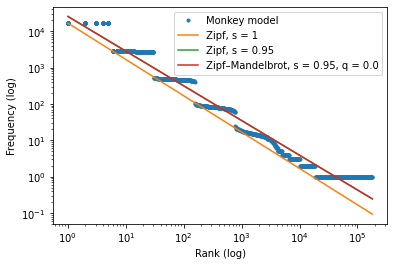

In [12]:
res = stats.linregress(np.log10(rank), np.log10(freq))

zipf_freq = (freq[0]/rank[0])/rank
Z_reg_freq = np.power(10, res.slope*np.log10(rank) + res.intercept)
ZM_reg_freq = np.power(10, opt_slope*np.log10(rank + opt_q) + opt_intercept)

plt.loglog(rank, freq, ".", label="Monkey model")
plt.loglog(rank, zipf_freq, label="Zipf, s = 1")
plt.loglog(rank, Z_reg_freq, label="Zipf, s = {0:0.2f}".format(-res.slope))
plt.loglog(rank, ZM_reg_freq, label="Zipf–Mandelbrot, s = {0:0.2f}, q = {1:0.1f}".format(-opt_slope, opt_q))

plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.legend()

#plt.tight_layout()
#plt.savefig("Monkey_model.pdf")

plt.show()

## Xấp xỉ phân phối của biến ngẫu nhiên bằng phương pháp mô phỏng

Để xấp xỉ hàm khối lượng xác suất (probability mass function) $f_X$ của một biến ngẫu nhiên rời rạc $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$ và tính các tần suất $p_x$ của biến cố "$X$ nhận giá trị $x$". 

> Khi $N$ đủ lớn, ta có $p_x \approx P(X = x) = f_X(x)$. 

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được **mô phỏng** (simulate) trên máy tính. (Chẳng hạn dùng thư viện tạo số ngẫu nhiên [numpy.random](https://numpy.org/doc/stable/reference/random/index.html).)

Để xấp xỉ hàm mật độ xác suất $f_X$ của một biến ngẫu nhiên liên tục $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, ghi nhận các giá trị mà $X$ nhận $x_1, x_2, ..., x_N$ (còn gọi là **mẫu dữ liệu** - sample).

> Khi $N$ đủ lớn, ta có thể dùng **histogram** hoặc **ước lượng mật độ nhân** (kernel density estimation, KDE) trên mẫu để xấp xỉ $f_X$. (Chẳng hạn dùng các hàm trong thư viện [Scipy Statistics](https://docs.scipy.org/doc/scipy/tutorial/stats.html) hay [Matplotlib](https://matplotlib.org/) hay [seaborn](https://seaborn.pydata.org/).)

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được **mô phỏng** (simulate) trên máy tính. (Chẳng hạn dùng thư viện tạo số ngẫu nhiên [numpy.random](https://numpy.org/doc/stable/reference/random/index.html).)

### Ví dụ 1

**Bài toán.** Chọn ngẫu nhiên một điểm trên một thanh có chiều dài 1 đơn vị, cắt tại điểm đó thành hai đoạn và giữ lại đoạn dài hơn. Tính kì vọng và tìm phân phối của chiều dài đoạn giữ lại.

Gọi $X$ là vị trí ngẫu nhiên chọn trên thanh thì $X \sim \mathcal{U}(0, 1)$. Do đó $X$ là biến ngẫu nhiên liên tục với hàm mật độ xác suất
$$
f_X(x) = 
    \begin{cases}
        1 & \text{nếu } 0 \le x \le 1, \\
        0 & \text{khác}.
    \end{cases}
$$

Gọi $Y$ là chiều dài của đoạn được giữ lại (tức là đoạn dài hơn) thì $Y = \max \{X, 1 - X\}$.

Ta có kì vọng của chiều dài đoạn giữ lại
\begin{align*}
    E(Y) &= E\left(\max\{X, 1 - X\}\right) = \int_{-\infty}^{\infty} \max\{x, 1 - x\}f_X(x)dx = \int_0^1 \max\{x, 1 - x\}dx \\
    &= \int_0^{1/2} \max\{x, 1 - x\}dx + \int_{1/2}^1 \max\{x, 1 - x\}dx = \int_0^{1/2} (1 - x)dx + \int_{1/2}^1 xdx \\
    &= \frac{3}{4}.
\end{align*}

Ta tìm hàm phân phối (tích lũy) của biến ngẫu nhiên $Y = \max\{X, 1 - X\}$
    $$
    F_Y(y) = P(Y \le y) = P(\max\{X, 1 - X\} \le y), y \in \mathbb{R}.
    $$

Xét các trường hợp của $y$

1. $y < 1/2$: $\left(\max\{X, 1 - X\} \le y\right) = \varnothing$ vì $0 \le X \le 1$ nên $1/2 \le \max\{X, 1 - X\}$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P(\varnothing) = 0.
    $$

2. $1/2 \le y \le 1$: $\left(\max\{X, 1 - X\} \le y\right) = \left(1 - y \le X \le y\right)$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P\left(1 - y \le X \le y\right) = \int_{1-y}^yf_X(x)dx =\int_{1-y}^ydy = 2y.
    $$
3. $y > 1$: $\left(\max\{X, 1 - X\} \le y\right) = \Omega$ vì $0 \le X \le 1$ nên $\max\{X, 1 - X\} \le 1$,
    $$
    P\left(\max\{X, 1 - X\} \le y\right) = P(\Omega) = 1.
    $$
    
Từ đó ta có
$$
F_Y(y) = 
    \begin{cases}
        0 & \text{nếu } y < 1/2, \\
        2y & \text{nếu } 1/2 \le y \le 1, \\
        1 & \text{nếu } 1 < y.
    \end{cases}
$$

Lấy đạo hàm của hàm phân phối, ta có hàm mật độ xác suất của $Y$ là
$$
f_Y(y) = F_Y'(y) = \begin{cases}
        2 & \text{nếu } 1/2 \le x \le 1, \\
        0 & \text{khác}.
    \end{cases}
$$

Như vậy $Y$ có phân phối đều trên đoạn $[1/2, 1]$, tức là $Y \sim \mathcal{U}(1/2, 1)$.

Lưu ý, từ phân phối của $Y$, $Y \sim \mathcal{U}(1/2, 1)$, ta cũng có $E(Y) = \frac{1/2+1}{2} = \frac{3}{4}$.

In [13]:
def greater_len(N):
    X = np.random.uniform(size=N)
    Y = np.maximum(X, 1 - X)    
    return Y

np.mean(greater_len(10000))

0.7480981816913407

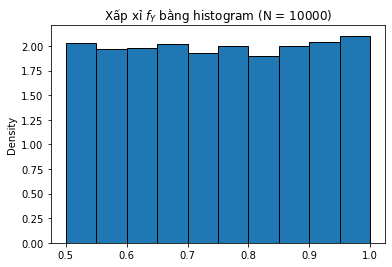

In [14]:
N = 10000

plt.hist(greater_len(N), density=True, edgecolor="black")
plt.ylabel("Density")
plt.title("Xấp xỉ $f_Y$ bằng histogram (N = {})".format(N))

#plt.tight_layout()
#plt.savefig("uniform_hist.pdf")

plt.show()

### Ví dụ 2

**Bài toán.** Cho $X_1, X_2, ..., X_n$ là $n$ biến ngẫu nhiên độc lập và cùng phân phối chuẩn $\mathcal{N}(\mu, \sigma^2)$. Đặt
$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i \;\;\; \text{và} \;\;\; S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2.
$$

($X_1, ..., X_n$ thường được gọi là một mẫu ngẫu nhiên cỡ $n$, $\bar{X}$ là trung bình mẫu và $S^2$ là phương sai mẫu.)

Tìm phân phối của các biến ngẫu nhiên $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ và $\frac{\bar{X} - \mu}{S/\sqrt{n}}$.

*Trả lời:* $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ có phân phối chuẩn tắc $\mathcal{N}(0, 1)$ và $\frac{\bar{X} - \mu}{S/\sqrt{n}}$ có **phân phối Student**| (Student's t-distribution) với $n-1$ bậc tự do.
    
Xem thêm phân phối Student tại [Wikipedia](https://en.wikipedia.org/wiki/Student\%27s_t-distribution).

In [15]:
def sample(mu, sigma, n, N):
    X = np.random.normal(mu, sigma, size=(N, n))
    X_bar = np.mean(X, axis=1)
    S2 = np.var(X, axis=1, ddof=1)
    return X_bar, S2

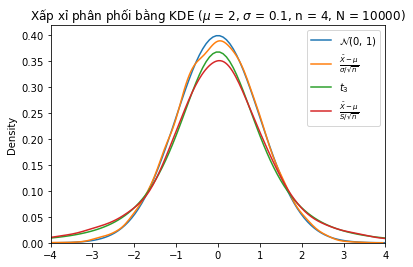

In [16]:
mu, sigma = 2, 0.1
n = 4
N = 10000

X_bar, S2 = sample(mu, sigma, n, N)

x_min, x_max = -4, 4
x = np.linspace(x_min, x_max, 100)

plt.plot(x, stats.norm.pdf(x), label=r"$\mathcal{N}$(0, 1)")
sns.kdeplot((X_bar - mu)/(sigma/np.sqrt(n)), label=r"$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$", clip=(x_min, x_max))
plt.plot(x, stats.t.pdf(x, n - 1), label=r"$t_{}$".format(n - 1))
sns.kdeplot((X_bar - mu)/(np.sqrt(S2)/np.sqrt(n)), label=r"$\frac{\bar{X} - \mu}{S/\sqrt{n}}$", clip=(x_min, x_max))

plt.ylabel("Density")
plt.title(r"Xấp xỉ phân phối bằng KDE ($\mu$ = {}, $\sigma$ = {}, n = {}, N = {})".format(mu, sigma, n, N))
plt.legend()
plt.xlim(x_min, x_max)

#plt.tight_layout()
#plt.savefig("Student_kde.pdf")

plt.show()

## Tài liệu

Sinh viên coi thêm các tài liệu sau

1. **Chapter 3-5**: Morris H. DeGroot, Mark J. Schervish. *Probability and Statistics*. Addison-Wesley, 2012.

2. **Chapter 3-5**: H. Pishro-Nik, "Introduction to probability, statistics, and random processes", available at https://www.probabilitycourse.com, Kappa Research LLC, 2014.